In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson

Text(0, 0.5, 'P(X)')

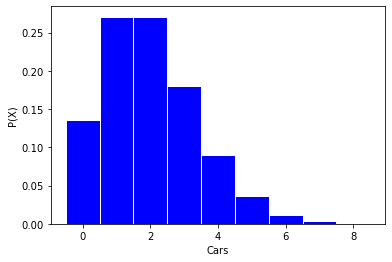

In [2]:
cars = stats.poisson(2)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = cars.pmf(x)

plt.bar(x, y, color='blue', edgecolor='white', width=1)
plt.xlabel('Cars')
plt.ylabel('P(X)')

In [3]:
# What is the probability that no cars drive up in the noon hour?

avg = 2

stats.poisson(avg).pmf(0)

cars = stats.poisson(2)

(cars.rvs(10_000) == 0).mean()


0.1376

In [4]:
# What is the probability that 3 or more cars come through the drive through?

estimated = cars.sf(2)
simulated = (cars.rvs(10_000) >= 3).mean()

estimated, simulated

(0.32332358381693654, 0.3185)

In [5]:
# How likely is it that the drive through gets at least 1 car?


estimated = cars.sf(0)
simulated = (cars.rvs(10_000) > 0).mean()

estimated, simulated

(0.8646647167633873, 0.859)

In [19]:
trials = cols = 100_000

samples = rows = 1000

mean = 3.0

std = .3

grades = np.random.normal(mean,std,trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)



In [20]:
grades

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,3.206259,2.756327,3.429789,3.099115,3.310919,3.205824,2.981726,2.859594,3.219629,2.812987,...,3.179706,3.751469,3.182214,3.276942,3.148934,3.083613,2.988706,2.980940,2.911497,2.580921
1,3.021981,2.759528,3.145563,3.282097,2.492489,2.706337,2.819466,2.501750,3.125432,3.256953,...,2.926698,2.962357,3.121833,3.235481,2.474002,2.536609,3.058431,2.771190,3.244992,2.857027
2,3.185827,2.998814,2.900976,3.139873,2.668826,3.044659,2.877503,3.396963,3.487606,3.173216,...,2.784995,2.841865,3.181983,3.304700,2.791739,3.008653,2.676879,2.845552,2.884283,3.120720
3,2.974211,2.898293,3.153900,2.815367,2.966688,2.870704,3.279296,2.599308,2.944292,2.910432,...,3.059749,3.086413,3.141065,2.812917,3.176042,3.397487,2.912735,2.770211,3.227402,2.876464
4,3.447593,3.071194,3.197466,3.003571,2.841381,2.725487,3.543711,3.292820,3.366822,3.384340,...,2.764340,3.121851,3.337415,3.068360,3.082728,2.965173,2.828162,2.565702,3.469411,2.950316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.814928,2.226953,3.426232,2.945250,2.249900,3.200067,3.387962,2.855117,2.786754,2.962977,...,2.906909,3.280095,2.852744,3.021449,2.680259,3.411434,3.537768,2.821611,2.955302,2.952721
996,3.300379,3.192176,2.941901,3.173455,2.868484,3.584904,2.971065,2.586575,3.043761,2.580292,...,2.874093,3.623044,2.823548,2.236349,3.167844,2.784064,2.829893,2.974887,2.699836,2.896215
997,2.886024,3.107589,2.326303,3.199212,2.755668,2.865718,3.041337,3.053784,3.163332,3.156628,...,3.146433,3.319128,3.737603,2.934089,2.932470,3.426911,2.785513,2.808939,3.052689,3.563885
998,3.147906,3.149880,3.111303,3.102434,3.066872,2.832147,2.951240,2.869950,2.778438,3.184426,...,2.941617,2.551190,3.151977,3.220493,3.021621,3.195433,3.253816,2.622436,3.031210,3.248149


In [21]:
grades = grades.apply(lambda x: x.sort_values().values)

grades = grades.loc[[95]].mean(axis=0)



In [9]:
grades.head()

0   -0.102407
1   -0.108021
2   -0.067639
3   -0.115159
4   -0.068473
dtype: float64

In [22]:
top_five_percent = grades.mean(axis=0)

top_five_percent



2.6078161179363337

In [23]:
# What grade point average is required to be in the top 5% of the graduating class?

stats.norm(3,.3).isf(.05)

3.4934560880854417

In [25]:
# What GPA constitutes the bottom 15% of the class?

trials = cols = 10_000

samples =  rows = 100

mean = 3.0
std = .3

grades = np.random.normal(mean, std, trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)

grades = grades.apply(lambda x: x.sort_values().values)

grades = grades.loc[[14]].mean(axis=0)

bottom_fifteen_percent = grades.mean(axis=0)

bottom_fifteen_percent

stats.norm(3,.3).ppf(.15)

2.689069983151863

In [ ]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [36]:
trials = cols = 100_000

samples = rows = 1000

mean = 3.0  

std = .3

grades = np.random.normal(mean,std,trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)

grades = grades.apply(lambda x: x.sort_values().values)

lower_range = grades.loc[[50]].mean(axis=0)

lower_range_mean = lower_range.mean()

lower_range_mean

upper_range = grades.loc[[89]].mean(axis=0)

upper_range_mean = upper_range.mean()

upper_range_mean

print("The range is between " + str(lower_range_mean) + " and " + str(upper_range_mean))



The range is between 2.5081949102638172 and 2.5969385291475215


In [28]:
grades = norm(mean,std)

lower = dist.ppf(.21)

upper = dist.ppf(.30)

print("The range is between " + str(lower) + " and " + str(upper))



The range is between 2.7580736258945278 and 2.842679846187588


In [41]:
# If I have a GPA of 3.5, what percentile am I in?

trials = cols = 100_000

samples = rows = 1000

mean = 3.0  

std = .3

grades = np.random.normal(mean, std,trials * samples).reshape(rows, cols)

grades = pd.DataFrame(grades)

(grades >= 3.5).sum(axis=1).mean()

grades = norm(mean, std)

grades.cdf(3.5)



0.9522096477271853

In [43]:
trials = cols = 100_000

samples = rows = 1000

rate = .02 

visitors = 4326

clicks = binom(n, rate)

clicks.sf(97)

0.11781530585978467

In [44]:
# How likely is it that this many people or more click through?

trials = rows = 100_000

samples = cols = 4326

data = np.random.uniform(1,101, samples * trials).reshape(rows,cols)

data = pd.DataFrame(data)

(((data < 3).sum(axis=1)) >= 97).sum() / trials

0.13934

In [49]:
trials = rows = 100_000

samples =  cols = 60

answers = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

answers = pd.DataFrame(answers)

answers.head()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,62.462216,65.526275,21.234455,100.125164,62.247491,25.802629,84.376912,99.660301,99.411764,74.805385,...,44.385712,50.497124,34.976312,4.674156,36.687824,90.549923,16.932078,94.023457,84.026107,93.300129
1,60.783402,81.925035,11.911412,92.507453,73.323911,81.456813,86.505459,89.777143,77.008168,61.692225,...,76.988147,51.450167,10.003724,3.580070,54.747568,6.013515,57.895825,47.247808,64.607550,36.537267
2,28.789317,28.618183,31.029098,26.541759,15.079206,62.493216,53.730002,82.090967,81.729904,53.032891,...,20.442934,63.221812,4.891267,17.050021,1.853623,64.944689,77.964824,94.818024,2.590318,43.607975
3,27.859138,99.000431,90.803054,26.105727,38.749787,100.905362,63.158217,44.443622,98.861928,76.595827,...,71.383799,6.412693,6.096954,73.706408,95.290776,17.601528,65.188596,54.388074,20.748788,94.033005
4,50.187130,70.337166,88.329586,40.693764,24.368215,45.273251,56.877358,23.513787,1.371845,11.776613,...,37.074763,56.749633,7.605494,33.334642,84.372474,29.753354,59.363907,20.353934,88.369004,15.289620


In [51]:
binom = binom(60, .01)

binom.sf(0)

0.45284335760923855

In [65]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import matplotlib.pyplot as plt


In [66]:
# many students will visit the break area on a given day

trials = rows = 100_000

samples =  cols = 59

data = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

data = pd.DataFrame(data)

(((data < 4).sum(axis=1)) > 0).sum() / trials

0.83507

In [74]:
n = 59

p = .03

dist = binom(n,p)

dist.sf(0)

0.8342199288437352

In [69]:
# How likely is it that it goes two days without getting cleaned up? 

trials = rows = 100_000

samples =  cols = 59

data = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

data = pd.DataFrame(data)

exp = (((data < 4).sum(axis=1)) > 0).sum() / trials

(1-exp)**2

0.027436609600000002

In [71]:
n = 59

p = .03

dist = binom(n,p)

calc = dist.sf(0)

(1-calc)**2

0.027483031992576224

In [73]:
# All week?
trials = rows = 100_000

samples =  cols = 59

data = np.random.uniform(1,101, trials * samples).reshape(rows, cols)

data = pd.DataFrame(data)

exp = (((data < 4).sum(axis=1)) > 0).sum() / trials

(1-exp)**7

3.58627183266891e-06

In [72]:
n = 59

p = .03

dist = binom(n,p)

c = dist.sf(0)

(1-c)**7

3.44132945698801e-06

In [76]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [79]:

trials = rows = 100_000

samples = cols = 1

mean = 15

std = 3

people = np.random.normal(mean,std,trials * samples)

(people <= 17).sum()/trials

0.74708

In [81]:
mean = 15

std = 3

binom = norm(mean,std)

binom.cdf(17)

0.7475074624530771

In [87]:
from env import get_db_url
import pandas as pd
import numpy as np

In [88]:
url = get_db_url("employees")
sql = """
SELECT * FROM employees
"""

employees = pd.read_sql(sql, url)
employees.shape

(300024, 6)

In [99]:
from env import get_db_url

database = "employees"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

query = """ SELECT * FROM salaries """

im = pd.read_sql(query, url)

salaries = pd.read_sql(query, url)

In [100]:
# What percent of employees earn less than 60,000?

μ, σ = salaries.salary.mean(), salaries.salary.std()
dist = stats.norm(μ, σ)

dist.cdf(60_000)

0.41082494791346336

In [101]:
# What percent of employees earn more than 95,000?

dist.sf(95_000)

0.03251945131024514

In [102]:
# What percent of employees earn between 65,000 and 80,000?

((salaries.salary > 65_000) & (salaries.salary < 80_000)).mean()

0.24327375743087226

In [103]:
# What do the top 5% of employees make?

salaries.salary.quantile(.95)

95761.0